PRIMER PARCIAL

Nombre: Rosa Leonor Blanco Moya

Carrera: Ingenieria de Sistemas

In [26]:
# utilizado para la manipulación de directorios y rutas
import os
# Cálculo científico y vectorial para python
import numpy as np
# Libreria para graficos
from matplotlib import pyplot
# Modulo de optimizacion en scipy
from scipy import optimize
# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline
import pandas as pd
import seaborn as sns


In [15]:
#Importamos el dataset
data = pd.read_csv('./wine_preparado.csv', delimiter=',')

In [24]:
data = {
    'Class': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Alcohol': [14.23, 13.2, 13.16, 14.37, 13.24, 14.2, 14.39, 14.06, 14.83, 13.86],
    'Malic_Acid': [1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87, 2.15, 1.64, 1.35],
    'Ash': [2.43, 2.14, 2.67, 2.5, 2.87, 2.45, 2.45, 2.61, 2.17, 2.27],
    'Alcalinity_of_Ash': [15.6, 11.2, 18.6, 16.8, 21, 15.2, 14.6, 17.6, 14, 16],
    'Magnesium': [127, 100, 101, 113, 118, 112, 96, 121, 97, 98],
    'Total_phenols': [2.8, 2.65, 2.8, 3.85, 2.8, 3.27, 2.5, 2.6, 2.8, 2.98],
    'Flavanoids': [3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52, 2.51, 2.98, 3.15],
    'Nonflavanoid_phenols': [0.28, 0.26, 0.3, 0.24, 0.39, 0.34, 0.3, 0.31, 0.29, 0.22],
    'Proanthocyanins': [2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98, 1.25, 1.98, 1.85],
    'Color_intensity': [5.64, 4.38, 5.68, 7.8, 4.32, 6.75, 5.25, 5.05, 5.2, 7.22],
    'Hue': [1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.02, 1.06, 1.08, 1.01],
    'OD280_OD315': [3.92, 3.4, 3.17, 3.45, 2.93, 2.85, 3.58, 3.58, 2.85, 3.55],
    'Proline': [1065, 1050, 1185, 1480, 735, 1450, 1290, 1295, 1045, 1045]
}

df = pd.DataFrame(data)

# Insertar nuevas columnas
regions = ['Bordeaux', 'Tuscany', 'Napa', 'Rioja', 'Burgundy']

# Añadir una columna de 'Region' con valores aleatorios
df['Region'] = np.random.choice(regions, size=len(df))

# Añadir una columna 'Is_Premium' basada en el contenido de 'Alcohol'
df['Is_Premium'] = df['Alcohol'] > 14

# Duplicar el dataset y agregar variaciones pequeñas para los valores numéricos
df_duplicate = df.copy()

# Introducir pequeñas variaciones a las columnas numéricas del dataset duplicado
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Solo para columnas numéricas
        variation = np.random.uniform(-0.5, 0.5, size=len(df))
        df_duplicate[column] = df[column] + variation

# Concatenar el dataset original con el duplicado
df_final = pd.concat([df, df_duplicate], ignore_index=True)

# Mostrar el dataset final
print(df_final.head())

   Class  Alcohol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0    1.0    14.23        1.71  2.43               15.6      127.0   
1    1.0    13.20        1.78  2.14               11.2      100.0   
2    1.0    13.16        2.36  2.67               18.6      101.0   
3    1.0    14.37        1.95  2.50               16.8      113.0   
4    1.0    13.24        2.59  2.87               21.0      118.0   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280_OD315  Proline    Region  Is_Premium  
0             5.64  1.04         3.92   1065.0     Rioja        True  
1             4.

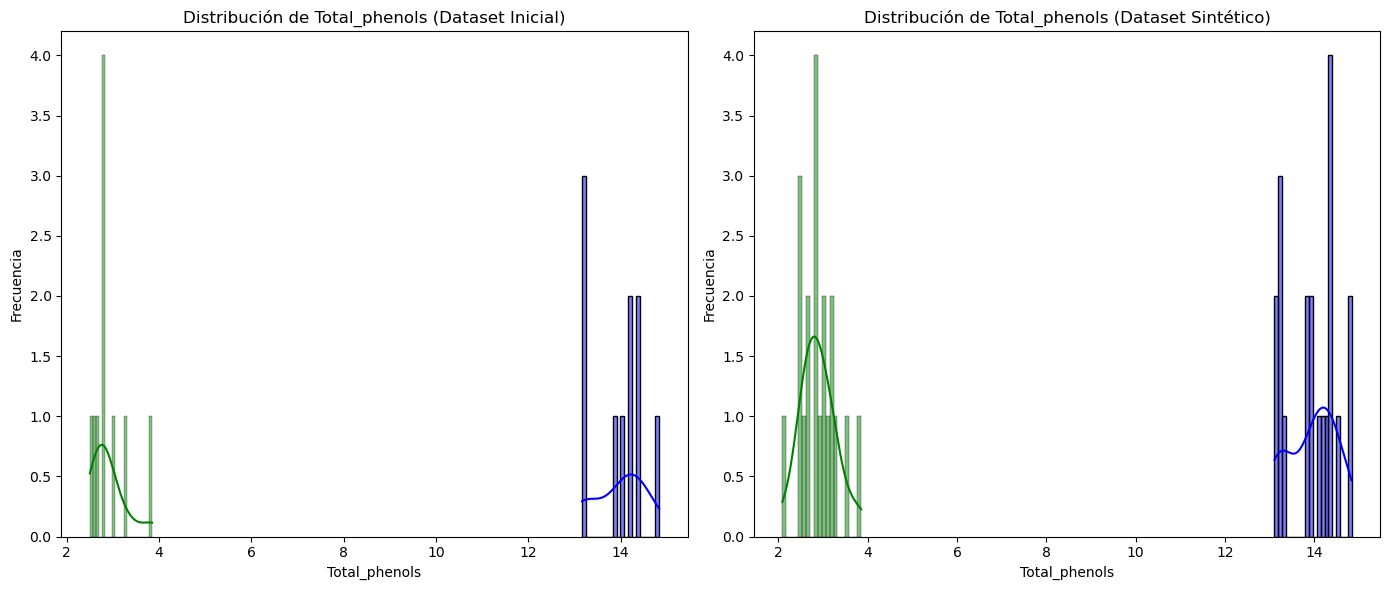

In [27]:
# Crear una gráfica para el dataset inicial
pyplot.figure(figsize=(14, 6))

# Subgráfico para el dataset inicial
pyplot.subplot(1, 2, 1)
sns.histplot(df['Alcohol'], bins=20, kde=True, color='blue')
pyplot.title('Distribución de Alcohol (Dataset Inicial)')
pyplot.xlabel('Alcohol')
pyplot.ylabel('Frecuencia')

sns.histplot(df['Total_phenols'], bins=20, kde=True, color='green')
pyplot.title('Distribución de Total_phenols (Dataset Inicial)')
pyplot.xlabel('Total_phenols')
pyplot.ylabel('Frecuencia')

# Crear una gráfica para el dataset sintético
pyplot.subplot(1, 2, 2)
sns.histplot(df_final['Alcohol'], bins=20, kde=True, color='blue')
pyplot.title('Distribución de Alcohol (Dataset Sintético)')
pyplot.xlabel('Alcohol')
pyplot.ylabel('Frecuencia')

sns.histplot(df_final['Total_phenols'], bins=20, kde=True, color='green')
pyplot.title('Distribución de Total_phenols (Dataset Sintético)')
pyplot.xlabel('Total_phenols')
pyplot.ylabel('Frecuencia')

pyplot.tight_layout()
pyplot.show()

In [ ]:
# La entrada es de 14 elemento contando con x0
input_layer_size  = 14

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 3

#  datos de entrenamiento almacenados en los arreglos X, y
# data = loadmat(os.path.join('Datasets', 'ex3data1.mat'))
data = np.loadtxt('/content/drive/MyDrive/datasets/wine_preparado.csv', delimiter=',')

# print(data['y'])
# print(data['y'].ravel())
# print(data['X'])
X = data[:, 1:]
y = data[:, 0]
# X, y = data['X'], data['y'].ravel()
# print(X)
# print(y)
# establecer el dígito cero en 0, en lugar del 10 asignado a este conjunto de datos
# Esto se hace debido a que el conjunto de datos se utilizó en MATLAB donde no hay índice 0
y[y == 3] = 0
# print(y)

m = y.size